In [7]:
# **Project Analysis Notebook**
# This notebook combines CRUD operations, EDA, modeling, and report generation for seamless analysis.

# ## 1. Setup and Libraries
# Import required libraries and set up the environment.

import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from fpdf import FPDF
import seaborn as sns
import matplotlib.pyplot as plt


data_path = "/home/jovyan/data/" 
report_path = "/home/jovyan/report"

ModuleNotFoundError: No module named 'fpdf'

In [25]:
# ## 2. CRUD Operations
# Test the CRUD functionality of the API.

BASE_URL = "http://api:8008"
# 1. Create a customer
def test_create_customer():
    data = {"name": "John Doe", "email": "john.doe@example.com"}
    try:
        response = requests.post(f"{BASE_URL}/customers/", json=data)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)
        print("Create Customer Response:", response.json())
    except requests.exceptions.RequestException as e:
        print("Create Customer Error:", e)

# 2. Read a customer by ID
def test_read_customer(customer_id):
    try:
        response = requests.get(f"{BASE_URL}/customers/{customer_id}")
        response.raise_for_status()
        print("Read Customer Response:", response.json())
    except requests.exceptions.RequestException as e:
        print("Read Customer Error:", e)

# 3. Update a customer by ID
def test_update_customer(customer_id):
    updated_data = {"name": "Jane Doe", "email": "jane.doe@example.com"}
    try:
        response = requests.put(f"{BASE_URL}/customers/{customer_id}", json=updated_data)
        response.raise_for_status()
        print("Update Customer Response:", response.json())
    except requests.exceptions.RequestException as e:
        print("Update Customer Error:", e)

# 4. Delete a customer by ID
def test_delete_customer(customer_id):
    try:
        response = requests.delete(f"{BASE_URL}/customers/{customer_id}")
        response.raise_for_status()
        print("Delete Customer Response:", response.json())
    except requests.exceptions.RequestException as e:
        print("Delete Customer Error:", e)

# 5. List all customers (if implemented by the API specialist)
def test_list_customers():
    try:
        response = requests.get(f"{BASE_URL}/customers/")
        response.raise_for_status()
        print("List Customers Response:", response.json())
    except requests.exceptions.RequestException as e:
        print("List Customers Error:", e)

# Running the tests
if __name__ == "__main__":
    print("Testing API Endpoints...")

    # Create a customer
    test_create_customer()

    # Read the customer with ID 1 (modify the ID as necessary)
    test_read_customer(1)

    # Update the customer with ID 1
    test_update_customer(1)

    # Delete the customer with ID 1
    test_delete_customer(1)


Testing API Endpoints...
Create Customer Error: HTTPConnectionPool(host='api', port=8008): Max retries exceeded with url: /customers/ (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0xffff68db7410>: Failed to establish a new connection: [Errno 111] Connection refused'))
Read Customer Error: HTTPConnectionPool(host='api', port=8008): Max retries exceeded with url: /customers/1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0xffff68db7490>: Failed to establish a new connection: [Errno 111] Connection refused'))
Update Customer Error: HTTPConnectionPool(host='api', port=8008): Max retries exceeded with url: /customers/1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0xffff37322f50>: Failed to establish a new connection: [Errno 111] Connection refused'))
Delete Customer Error: HTTPConnectionPool(host='api', port=8008): Max retries exceeded with url: /customers/1 (Caused by NewConnectionError('<urllib3.con

### Exploratory Data Analysis ###
   Customer_ID            Name                     Email
0            1   Hannah Miller   hannah.miller@gmail.com
1            2   Charlie Brown   charlie.brown@gmail.com
2            3  Charlie Miller  charlie.miller@gmail.com
3            4   Evan Williams   evan.williams@yahoo.com
4            5   Charlie Davis   charlie.davis@gmail.com
   product_ID       product_name     category                    description  \
0           1  Perfume Model 747  Electronics              Affordable Jacket   
1           2  Blender Model 686      Fashion            High-quality Laptop   
2           3  Perfume Model 329       Sports  Energy-saving Air Conditioner   
3           4  Perfume Model 892       Sports          Energy-saving Blender   
4           5   Laptop Model 993       Beauty                  Durable Novel   

                                   logo_url release_date  
0          http://example.com/perfume_0.png   2022-06-29  
1  http://example.com/air

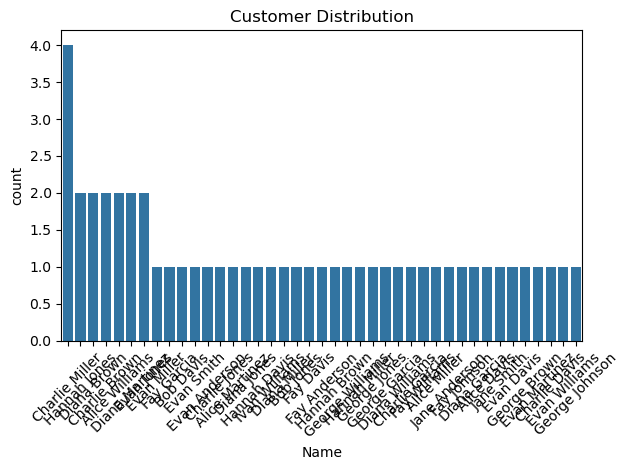

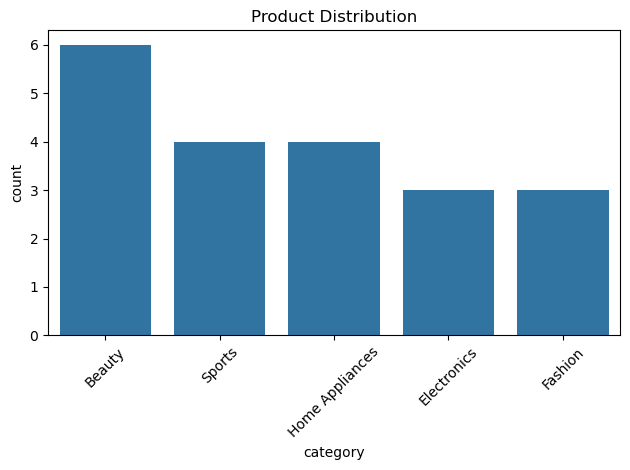

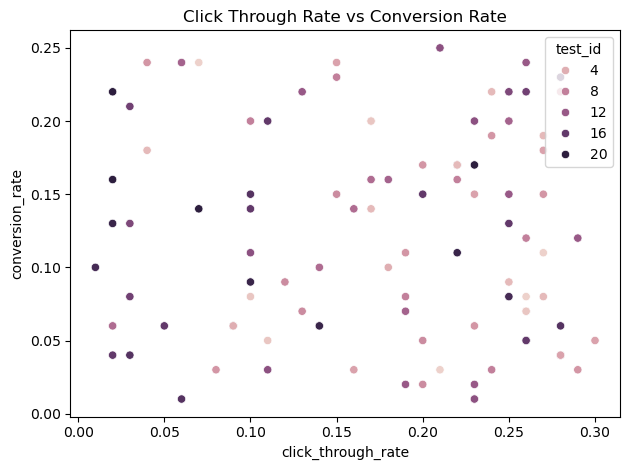

In [10]:
# ## 3. Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
print("### Exploratory Data Analysis ###")
data_path = "/home/jovyan/data/" 
report_path = "/home/jovyan/report"

# Load Data
customers = pd.read_csv(data_path + "customers.csv")
products = pd.read_csv(data_path + "products.csv")
ab_testing = pd.read_csv(data_path + "ab_testing.csv")
results = pd.read_csv(data_path + "results.csv")

# Data Summaries
print(customers.head())
print(products.head())
print(ab_testing.head())
print(results.head())

# --- EDA Visualizations ---
# 1. Customer Distribution
sns.countplot(data=customers, x="Name", order=customers["Name"].value_counts().index)
plt.title("Customer Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(report_path + "customer_distribution.png")
plt.show()

# 2. Product Distribution
sns.countplot(data=products, x="category", order=products["category"].value_counts().index)
plt.title("Product Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(report_path + "product_distribution.png")
plt.show()

# 3. A/B Testing Results
sns.scatterplot(data=results, x="click_through_rate", y="conversion_rate", hue="test_id")
plt.title("Click Through Rate vs Conversion Rate")
plt.tight_layout()
plt.savefig(report_path + "click_vs_conversion.png")
plt.show()

### Modeling ###
Unique classes in y: [0 1]
Class distribution in y:
conversion_rate
1    53
0    47
Name: count, dtype: int64
Class distribution after resampling:
conversion_rate
1    42
0    42
Name: count, dtype: int64
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.60      0.55      0.57        11

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20

Random Forest Report:
               precision    recall  f1-score   support

           0       0.29      0.22      0.25         9
           1       0.46      0.55      0.50        11

    accuracy                           0.40        20
   macro avg       0.37      0.38      0.37        20
weighted avg       0.38      0.40      0.39        20

Logistic Regression Accuracy: 0.55
Random Forest Accuracy: 0.4


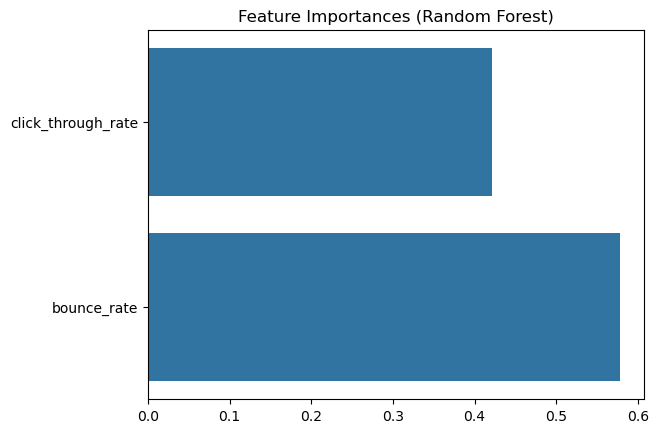

In [22]:
# ## 4. Modeling

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import os

print("### Modeling ###")

# Prepare Features and Target
features = ["click_through_rate", "bounce_rate"]
target = "conversion_rate"

# Adjust threshold for binary classification (lower threshold to create balanced classes)
threshold = 0.1  # Adjusted threshold
y = (results[target] > threshold).astype(int)

# Check class distribution
print("Unique classes in y:", y.unique())
print("Class distribution in y:")
print(y.value_counts())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure balanced classes using SMOTE if imbalance persists
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after resampling:")
print(pd.Series(y_train_resampled).value_counts())

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_resampled, y_train_resampled)
log_y_pred = log_model.predict(X_test)
log_report = classification_report(y_test, log_y_pred)
print("Logistic Regression Report:\n", log_report)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_y_pred = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_y_pred)
print("Random Forest Report:\n", rf_report)

# Compare Model Performance
from sklearn.metrics import accuracy_score
log_accuracy = accuracy_score(y_test, log_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Logistic Regression Accuracy: {log_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

# Save Reports
if not os.path.exists(report_path):
    os.makedirs(report_path)

with open(report_path + "modeling_report.txt", "w") as file:
    file.write("Logistic Regression Report:\n")
    file.write(log_report)
    file.write("\nRandom Forest Report:\n")
    file.write(rf_report)

# Save Feature Importances (Random Forest)
sns.barplot(x=rf_model.feature_importances_, y=features)
plt.title("Feature Importances (Random Forest)")
plt.savefig(report_path + "feature_importances.png")
plt.show()
